# IPL outcome Prediction
## The objective of this solution is to create dashboard that visualizes following capabilities and also forecast the future results
1. To find the team that won the most number of matches in the entire IPL.
2. To find the team that lost the most number of matches in the entire IPL.
3. Does winning a toss increase the chances of victory.
4. To find the player with the most player of the match awards.
5. To find the city that hosted the maximum number of IPL matches.
6. To find the most winning team for each season.
7. To find the on-field umpire with the maximum number of IPL matches.
8. To find the biggest victories in IPL while defending a total and while chasing a total.
9. Which team won the most matches while batting first.
10. Which team won the most matches while batting second.
11. List of teams which have won matches by most runs cumulatively


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv('../dataset/matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
df.city.replace({"Bangalore":"Bengaluru"}, inplace = True)
df.city.unique()


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [11]:
'''array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)
'''
df.team1.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
df.team2.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
df.toss_winner.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
df.winner.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
# df.team1.unique()
df.team1.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)
df.team2.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)
df.toss_winner.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)
df.winner.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)

df.team1.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)
df.team2.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)
df.toss_winner.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)
df.winner.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)

In [7]:
df.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)

### Handling Missing Values

In [8]:
df.city.fillna("unknown")
df.winner.fillna("unknown")
df.umpire3.fillna("unknown")
df.umpire1.fillna("unknown")
df.umpire2.fillna("unknown")
df.result.fillna("unknown")
df.player_of_match.fillna("unknown")

0      Yuvraj Singh
1         SPD Smith
2           CA Lynn
3        GJ Maxwell
4         KM Jadhav
           ...     
751       HH Pandya
752        AS Yadav
753         RR Pant
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, Length: 756, dtype: object

# #1.To find the team that won the most number of matches in the entire IPL.


In [12]:
most_no_of_wins = df.groupby('winner').apply(lambda x: x).reset_index()
most_no_of_wins = most_no_of_wins.groupby('winner').count()
most_no_of_wins = most_no_of_wins.city.reset_index(name='No_Of_Wins')
most_no_of_wins = most_no_of_wins.sort_values(by='No_Of_Wins',ascending=False)
#exporting to csv
# most_no_of_wins.to_csv('D:/IPL/output/most_wins_by_team.csv')

## Plotting

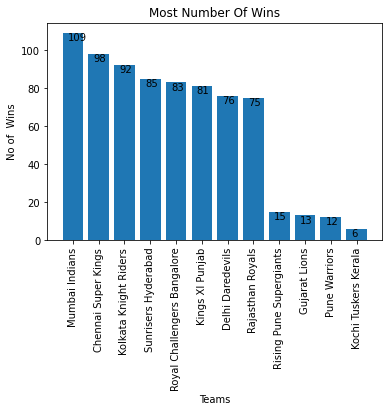

In [13]:
plt.title("Most Number Of Wins")
plt.bar(most_no_of_wins.winner , most_no_of_wins.No_Of_Wins)
plt.xlabel("Teams")
plt.ylabel("No of  Wins")
count = 0
for i in most_no_of_wins.No_Of_Wins:
    plt.text(count-0.2,i-4,str(i))
    count+=1
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

### 2.To find the team that lost the most number of matches in the entire IPL.

In [28]:
df1 = df

In [102]:
# 1. Who played most matches
# 2. Who not in winner
# Kochi Tuskers Kerala Delhi Capitals
team_lost = pd.DataFrame([], columns={'Team', 'Matches Lost'})
t = df.groupby('season')['winner'].apply(print)
t.

59           Kolkata Knight Riders
60             Chennai Super Kings
61                Delhi Daredevils
62     Royal Challengers Bangalore
63           Kolkata Knight Riders
64                Rajasthan Royals
65                Delhi Daredevils
66             Chennai Super Kings
67                Rajasthan Royals
68                 Kings XI Punjab
69                Rajasthan Royals
70             Chennai Super Kings
71                 Deccan Chargers
72                 Kings XI Punjab
73             Chennai Super Kings
74                  Mumbai Indians
75                Delhi Daredevils
76                 Kings XI Punjab
77                Rajasthan Royals
78                Delhi Daredevils
79     Royal Challengers Bangalore
80                 Kings XI Punjab
81                  Mumbai Indians
82                Rajasthan Royals
83                 Kings XI Punjab
84                 Deccan Chargers
85                  Mumbai Indians
86             Chennai Super Kings
87           Kolkata

pandas.core.series.Series

In [94]:
year = 2008
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[0]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)


NameError: name 'win_per_season_df' is not defined

### 3.Does winning a toss increase the chances of victory.

In [105]:
win_count = 0
for index, value in df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


### 4.To find the player with the most player of the match awards.

In [126]:
mom = df.groupby('player_of_match').apply(lambda x: x).reset_index()
mom = mom.groupby('player_of_match').count()
mom = mom.city.reset_index(name='No_Of_Awards')
mom = mom.sort_values(by='No_Of_Awards',ascending=False)
mom = mom.head(10)
# exporting to csv
mom.to_csv('../output/most_MOM.csv')

In [127]:
mom

,player_of_match,No_Of_Awards
35,CH Gayle,21
10,AB de Villiers,20
167,RG Sharma,17
42,DA Warner,17
137,MS Dhoni,17
222,YK Pathan,16
201,SR Watson,15
191,SK Raina,14
56,G Gambhir,13
123,MEK Hussey,12


## Plotting

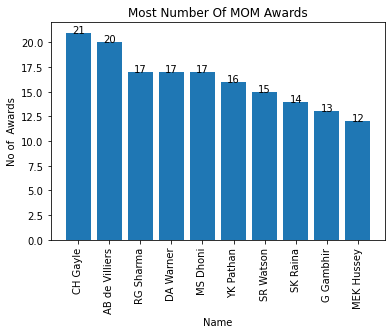

In [119]:
plt.title("Most Number Of MOM Awards")
plt.bar(mom.player_of_match , mom.No_Of_Awards)
plt.xlabel("Name")
plt.ylabel("No of  Awards")
count = 0
for i in mom.No_Of_Awards:
    plt.text(count-0.2,i,str(i))
    count+=1
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

## 5.To find the city that hosted the maximum number of IPL matches.

In [89]:
city_counts=df.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
req_values = city_counts.sort_values('Match Counts' , ascending = False).reset_index(drop = True)
req_values = req_values[:20]
#exporting to csv
req_values.to_csv('../output/most_matches_cities.csv')

## Plotting

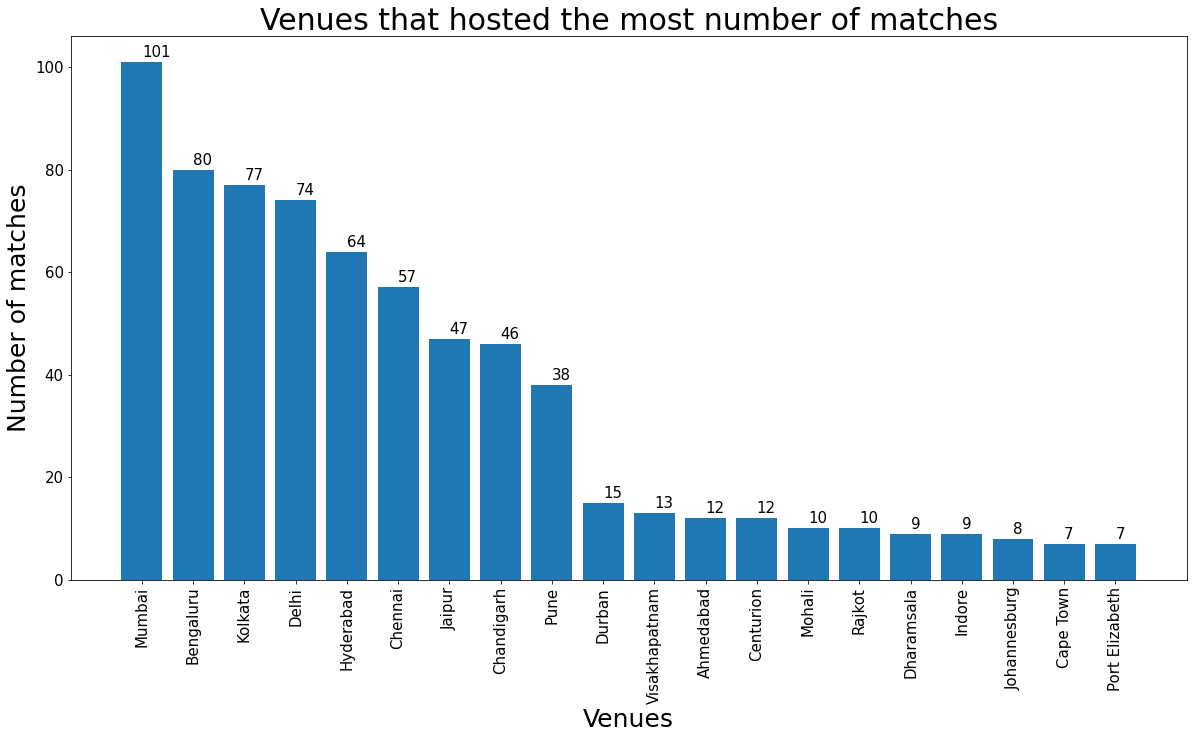

In [90]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.title('Venues that hosted the most number of matches', size =30)
plt.xlabel('Venues',size =25)
plt.ylabel('Number of matches',size =25)
plt.xticks(rotation=90,size = 15)
plt.yticks(size = 15)
count = 0
for i in req_values['Match Counts']:
    plt.text(count,i+1,str(i),color='black',size=15)
    count+=1
plt.bar(req_values['city'],req_values['Match Counts'])
plt.show()



## 6.To find the most winning team for each season.

In [116]:
teams_per_season = df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [118]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [127]:
win_per_season_df
# export to csv
win_per_season_df.to_csv('../output/winning_team_per_season')

## Plotting

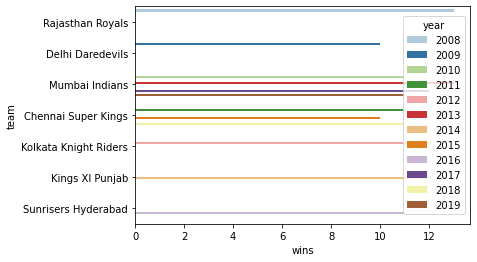

In [126]:
sns.barplot(x='wins', y='team', hue='year', data=win_per_season_df, palette='Paired');

## 7.To find the on-field umpire with the maximum number of IPL matches

In [102]:
u1 = df['umpire1'].value_counts()
u2 = df['umpire2'].value_counts()
ump = pd.concat([u1, u2], axis=1)
umpire_ser = ump.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 
umpire_df.sort_values('matches',ascending=False).head()
# export to csv
umpire_df.to_csv('../output/most_umpire_on_field')

## Plotting

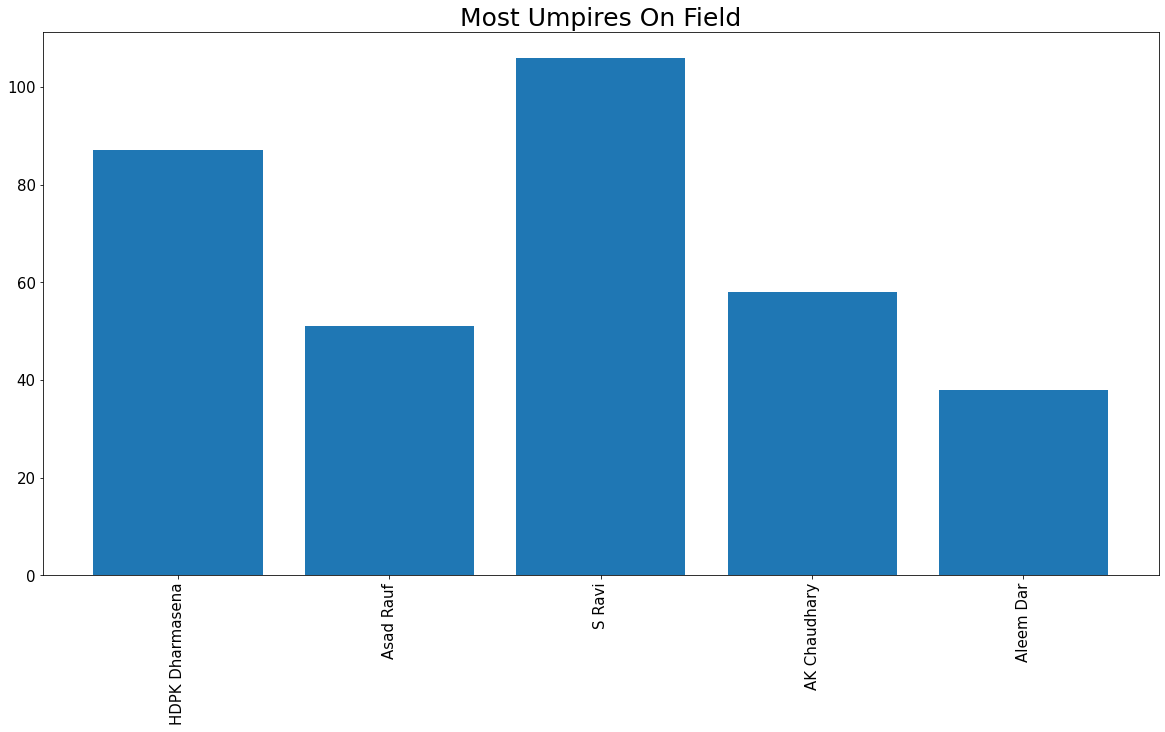

In [103]:
# Top 5 umpires 
umpire_df = umpire_df.head()
plt.bar(umpire_df['umpire'], umpire_df['matches'])
plt.title("Most Umpires On Field", fontsize=25)
plt.xticks(rotation = 90, size=15)
plt.yticks(size=15)
plt.show()

### 8.To find the biggest victories in IPL while defending a total and while chasing a total.

###            Defending Victory

In [108]:
# Defending Score
defend_vict_ser = df['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
105      1
87       1
42       1
93       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [109]:
score = 146
for index, row in df.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


### Chasing Victory

In [110]:
chasing_vict_ser = df['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

In [112]:
for index, row in df.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [113]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


## Plotting

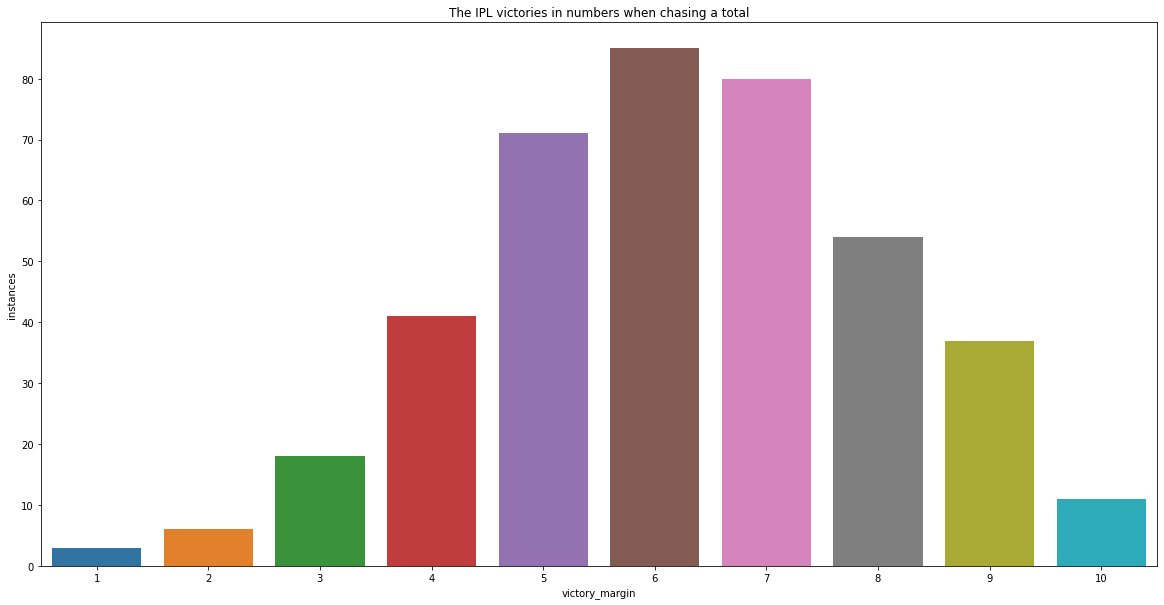

In [114]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);

## 9.Which team won the most matches while batting first.

In [186]:
# Picking up who choosed batting first
bat = df.loc[df['toss_decision'] == 'bat']
# to_drop = ['season', 'city', 'date', 'win_by_runs','result','dl_applied','win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
drop = ['id','team1','team2', 'toss_winner', 'toss_decision', 'winner']  # required columns
bat.drop(bat.columns.difference(drop), 1, inplace=True)
# bat.head()

In [177]:
bat_first = pd.DataFrame({'Batting First':bat['winner']})
bat_first = bat_first.value_counts()

# Generating Labels and values
bat_labels = [x[0] for x in bat_first.keys()]
bat_values = bat_first.to_list()
# export to csv
bat_first.to_csv('../output/won_by_batting_first.csv')

## Plotting 

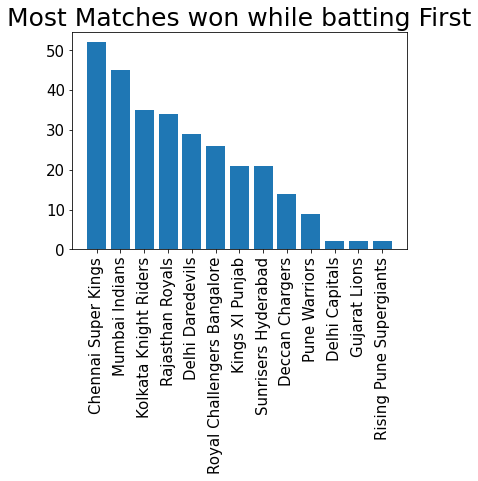

In [179]:
plt.bar(bat_labels, bat_values)
plt.title("Most Matches won while batting First", fontsize=25)
plt.xticks(rotation = 90, size=15)
plt.yticks(size=15)
plt.show()

## 10.Which team won the most matches while batting second.

In [183]:
# Picking up who took batting second
field = df.loc[df['toss_decision'] == 'field']
# to_drop = ['season', 'city', 'date', 'win_by_runs','result','dl_applied','win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
drop = ['id','team1','team2', 'toss_winner', 'toss_decision', 'winner']  # required columns
field.drop(field.columns.difference(drop), 1, inplace=True)
# field.head()


In [184]:
batting_second = pd.DataFrame({'Batting Second': field['winner']})
batting_second = batting_second.value_counts()

# picking up the lables
field_label = [x[0] for x in batting_second.keys()]
field_values = batting_second.to_list()
# export to csv
batting_second.to_csv('../output/won_by_batting_second.csv')
batting_second

Batting Second             
Mumbai Indians                 64
Kings XI Punjab                61
Royal Challengers Bangalore    58
Kolkata Knight Riders          57
Chennai Super Kings            48
Rajasthan Royals               41
Delhi Daredevils               38
Sunrisers Hyderabad            37
Deccan Chargers                15
Gujarat Lions                  11
Rising Pune Supergiant         10
Delhi Capitals                  8
Kochi Tuskers Kerala            6
Pune Warriors                   3
Rising Pune Supergiants         3
dtype: int64

## Plotting

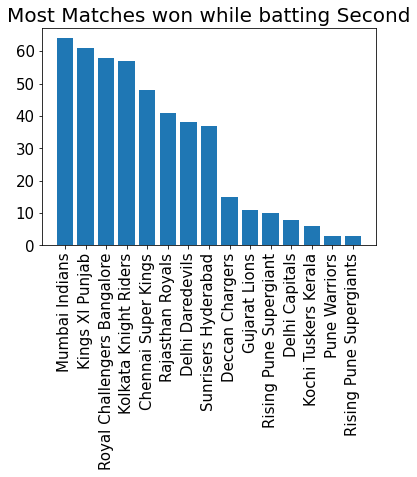

In [185]:
plt.bar(field_label, field_values)
plt.title("Most Matches won while batting Second", fontsize=20)
plt.xticks(rotation = 90, size=15)
plt.yticks(size=15)
plt.show()

### 11. List of teams which have won matches by most runs cumulatively

In [25]:
mrc = df.sort_values('win_by_runs',ascending = False).reset_index(drop = True)
mrc = mrc[:10]
mrc = mrc[['winner','win_by_runs']]

#export to csv
# mrc.to_csv("../output/Win_Most_Runs_cumulatively.csv")
mrc

,winner,win_by_runs
0,Mumbai Indians,146
1,Royal Challengers Bangalore,144
2,Kolkata Knight Riders,140
3,Royal Challengers Bangalore,138
4,Royal Challengers Bangalore,130
5,Sunrisers Hyderabad,118
6,Kings XI Punjab,111
7,Rajasthan Royals,105
8,Mumbai Indians,102
9,Mumbai Indians,98
